In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('Приборы учета на концах теплотрассы 2000 ЖК посуточно (сокращен).xls')
#every 177 step address
count = 0
address = []
for i,k in zip(df['Unnamed: 1'], df['Unnamed: 3']):
    if i == 'Адрес:': 
        address.append(k)
    count+=1

print(address)

['Кривогуза 01 Кривогуза ул. 1', 'Сейфулина 37 (73А) Сейфуллина ул. 73А', 'Манаса ул. 12/1 Манаса ул. 12/1', 'Промзона 19 район ТЭЦ-1 Промзона 19 район ТЭЦ-1 0', 'Есенберлина 4 Есенберлина ул.(Акжайык) 4', 'Букейхана 2 Букейхана ул. 2', 'Букейхана 2/1 Букейхана ул. 2/1', 'Жумабаева 14 Жумабаева ул. 14', 'Кривогуза 01 Кривогуза ул. 1', 'Акмолинская 2 Акмолинская ул. 2', 'Мусрепова 4/2; Ѓабит М‰сірепов ул. 4/2', 'Богенбая 26(56) Богенбая пр. 26', 'Ауэзова 15/1 Мухтара Ауэзова ул. 15/1', 'Сейфуллина д.208А. Сейфуллина ул. 208А', 'Женис 47 Женис пр. 47', 'Жубанова 63А Жубанова ул. 63А', 'Кабанбай батыра 2/6 ?абанбай батыр пр. 2/6', 'Момышулы 4 Момыш±лы Б.пр. 4', 'пер.Макинский д.1 Макинский пер. 1', 'Кеменгерулы 10 Кеменгерулы ул. 10', 'Омарова 100 Омарова Ж. ул. 100', 'Куйши Дина 23; К‰йшi Дина ул. 23', 'Героев Краснодона ул.2/1 Героев Краснодона ул. 2/1', 'ул. Бейбитшилик Бейбитшилик ул. 24', 'Алаш шоссе (Софиевское шоссе) 30 Алаш шоссе (Софиевское шоссе) 30', 'Бейбитшилик 16/1 Бейбитшил

In [2]:
len(address)

34

In [26]:
address_init = address
address[0] = 'Шынтас 1, Нұр-Сұлтан'
address[1] = 'Сейфуллина 37, Нұр-Сұлтан'
address[2] = 'Манас 12 Нұр-Сұлтан'
address[3] = 'Өндіріс 4 Нұр-Сұлтан'
address[4] = 'Есенберлин, 4, Нұр-Сұлтан'
address[5] = 'Букейхана 2'
address[6] = 'Букейхана 2/1'
address[7] = 'Жумабаева 14, Нұр-Сұлтан'
address[8] = 'Шынтас 1, Нұр-Сұлтан'
address[9] = 'Гумар Караш 2, Нұр-Сұлтан'
address[10] = 'Мусрепова 4/2, Нұр-Сұлтан'
address[11] = 'Богенбая 26, Нұр-Сұлтан'
address[12] = 'Мухтара Ауэзова 15/1'
address[13] = 'Сейфуллина, Нұр-Сұлтан'
address[14] = 'Женис 47, Нұр-Сұлтан'
address[15] = 'Жубанова 63А, Нұр-Сұлтан'
address[16] = 'Кабанбай батыра 2/6, Нұр-Сұлтан'
address[17] = 'Момышулы 4, Нұр-Сұлтан'
address[18] = 'Макинский 1, Нұр-Сұлтан'
address[19] = 'Кеменгерулы 10, Нұр-Сұлтан'
address[20] = 'Омарова 100, Нұр-Сұлтан'
address[21] = 'Куйши Дина 23, Нұр-Сұлтан'
address[22] = 'Сыдыка Мухамеджанова 2, Нұр-Сұлтан'
address[23] = 'Бейбитшилик 24, Нұр-Сұлтан'
address[24] = 'Алаш шоссе 30, Нұр-Сұлтан'
address[25] = 'Бейбитшилик 16/1, Нұр-Сұлтан'
address[26] = 'Мусрепова 7/2, Нұр-Сұлтан'
address[27] = 'Желтоксана 48/1, Нұр-Сұлтан'
address[28] = 'Промзона 112, Нұр-Сұлтан'
address[29] = 'Сейфуллина 5, Нұр-Сұлтан'
address[30] = 'Туран 8, Нұр-Сұлтан'
address[31] = 'Сейфуллина 25, Нұр-Сұлтан'
address[32] = 'Женис 24, Нұр-Сұлтан'
address[33] = 'Абылай хана 21/2, Нұр-Сұлтан'

In [45]:
import geopy
import numpy as np
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent='myapplication')
locs = []
missing = []
count = 0
for i in address:
    location = geolocator.geocode(i)
    try:
        locs.append([count, i, [location.longitude, location.latitude]])
        print([location.address, [location.longitude, location.latitude]])
    except: 
        missing.append([count, i])
    
    count+=1
locs

['1, переулок Шынтас, район "Сарыарка", Нұр-Сұлтан, 010000, Қазақстан', [71.39820238969105, 51.1981188]]
['37, улица Сакена Сейфуллина, район "Байконур", Нұр-Сұлтан, 010000, Қазақстан', [71.42974036780862, 51.172306]]
['шоссе Ондирис, район "Байконур", Нұр-Сұлтан, 010000, Қазақстан', [71.3820717, 51.2370001]]
['2, улица Азербайжана Мамбетова, район "Сарыарка", Нұр-Сұлтан, 010000, Қазақстан', [71.42645568909903, 51.15898305]]
['2/1, улица Азербайжана Мамбетова, район "Сарыарка", Нұр-Сұлтан, 010000, Қазақстан', [71.42697234398388, 51.15873]]
['Студенттер үйі №4, 14, проспект Жумабаева, район "Алматы", Нұр-Сұлтан, 010000, Қазақстан', [71.48230268701327, 51.15274505]]
['1, переулок Шынтас, район "Сарыарка", Нұр-Сұлтан, 010000, Қазақстан', [71.39820238969105, 51.1981188]]
['4/2, улица Габита Мусрепова, район "Алматы", Нұр-Сұлтан, 010000, Қазақстан', [71.50282940219634, 51.15081255]]
['улица Мухтара Ауэзова, район "Сарыарка", Нұр-Сұлтан, 010000, Қазақстан', [71.4216202, 51.1768723]]
['Казахс

[[0, 'Шынтас 1, Нұр-Сұлтан', [71.39820238969105, 51.1981188]],
 [1, 'Сейфуллина 37, Нұр-Сұлтан', [71.42974036780862, 51.172306]],
 [3, 'Өндіріс 4 Нұр-Сұлтан', [71.3820717, 51.2370001]],
 [5, 'Букейхана 2', [71.42645568909903, 51.15898305]],
 [6, 'Букейхана 2/1', [71.42697234398388, 51.15873]],
 [7, 'Жумабаева 14, Нұр-Сұлтан', [71.48230268701327, 51.15274505]],
 [8, 'Шынтас 1, Нұр-Сұлтан', [71.39820238969105, 51.1981188]],
 [10, 'Мусрепова 4/2, Нұр-Сұлтан', [71.50282940219634, 51.15081255]],
 [12, 'Мухтара Ауэзова 15/1', [71.4216202, 51.1768723]],
 [13, 'Сейфуллина, Нұр-Сұлтан', [71.40944684086821, 51.186902700000005]],
 [14, 'Женис 47, Нұр-Сұлтан', [71.40950480351489, 51.17970445]],
 [15, 'Жубанова 63А, Нұр-Сұлтан', [71.4575454, 51.1586719]],
 [17, 'Момышулы 4, Нұр-Сұлтан', [71.46975887668273, 51.13717535]],
 [18, 'Макинский 1, Нұр-Сұлтан', [71.4490847074003, 51.15652865]],
 [19, 'Кеменгерулы 10, Нұр-Сұлтан', [71.39774142746325, 51.20645585]],
 [20, 'Омарова 100, Нұр-Сұлтан', [71.43461

In [46]:
missing

[[2, 'Манас 12 Нұр-Сұлтан'],
 [4, 'Есенберлин, 4, Нұр-Сұлтан'],
 [9, 'Гумар Караш 2, Нұр-Сұлтан'],
 [11, 'Богенбая 26, Нұр-Сұлтан'],
 [16, 'Кабанбай батыра 2/6, Нұр-Сұлтан'],
 [21, 'Куйши Дина 23, Нұр-Сұлтан'],
 [22, 'Сыдыка Мухамеджанова 2, Нұр-Сұлтан'],
 [24, 'Алаш шоссе 30, Нұр-Сұлтан'],
 [27, 'Желтоксана 48/1, Нұр-Сұлтан'],
 [33, 'Абылай хана 21/2, Нұр-Сұлтан']]

In [ ]:
apikey = ''

In [31]:
import googlemaps

gmaps = googlemaps.Client(key=apikey)
missing_ret = []

for i,j in missing:
    results = gmaps.places(j)
    for item in results['results']:
        missing_ret.append([i,j, [item['geometry']['location']['lng'], item['geometry']['location']['lat']]])
        break
missing_ret

[[2, 'Манас 12 Нұр-Сұлтан', [71.4893367, 51.1577124]],
 [4, 'Есенберлин, 4, Нұр-Сұлтан', [71.4037929, 51.1923627]],
 [9, 'Гумар Караш 2, Нұр-Сұлтан', [71.4348819, 51.1615441]],
 [11, 'Богенбая 26, Нұр-Сұлтан', [71.4042036, 51.1744619]],
 [16, 'Кабанбай батыра 2/6, Нұр-Сұлтан', [71.4258569, 51.1493863]],
 [21, 'Куйши Дина 23, Нұр-Сұлтан', [71.4805374, 51.148757]],
 [22, 'Сыдыка Мухамеджанова 2, Нұр-Сұлтан', [71.3966472, 51.19053539999999]],
 [24, 'Алаш шоссе 30, Нұр-Сұлтан', [71.4862454, 51.2027019]],
 [27, 'Желтоксана 48/1, Нұр-Сұлтан', [71.41463619999999, 51.1814692]],
 [33, 'Абылай хана 21/2, Нұр-Сұлтан', [71.4816404, 51.1563743]]]

In [135]:
df = pd.DataFrame()
df['id'] = [i[0] for i in locs] + [i[0] for i in missing_ret]
df['address'] = [i[1] for i in locs] + [i[1] for i in missing_ret]
df['lon_lat'] = [i[2] for i in locs] + [i[2] for i in missing_ret]
df

,id,address,lon_lat
0,0,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
1,1,"Сейфуллина 37, Нұр-Сұлтан","[71.42974036780862, 51.172306]"
2,3,Өндіріс 4 Нұр-Сұлтан,"[71.3820717, 51.2370001]"
3,5,Букейхана 2,"[71.42645568909903, 51.15898305]"
4,6,Букейхана 2/1,"[71.42697234398388, 51.15873]"
5,7,"Жумабаева 14, Нұр-Сұлтан","[71.48230268701327, 51.15274505]"
6,8,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
7,10,"Мусрепова 4/2, Нұр-Сұлтан","[71.50282940219634, 51.15081255]"
8,12,Мухтара Ауэзова 15/1,"[71.4216202, 51.1768723]"
9,13,"Сейфуллина, Нұр-Сұлтан","[71.40944684086821, 51.186902700000005]"


In [136]:
df = df.sort_values('id')

In [137]:
df

,id,address,lon_lat
0,0,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
1,1,"Сейфуллина 37, Нұр-Сұлтан","[71.42974036780862, 51.172306]"
24,2,Манас 12 Нұр-Сұлтан,"[71.4893367, 51.1577124]"
2,3,Өндіріс 4 Нұр-Сұлтан,"[71.3820717, 51.2370001]"
25,4,"Есенберлин, 4, Нұр-Сұлтан","[71.4037929, 51.1923627]"
3,5,Букейхана 2,"[71.42645568909903, 51.15898305]"
4,6,Букейхана 2/1,"[71.42697234398388, 51.15873]"
5,7,"Жумабаева 14, Нұр-Сұлтан","[71.48230268701327, 51.15274505]"
6,8,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
26,9,"Гумар Караш 2, Нұр-Сұлтан","[71.4348819, 51.1615441]"


In [138]:
df = df.reset_index(inplace = False)
df

,index,id,address,lon_lat
0,0,0,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
1,1,1,"Сейфуллина 37, Нұр-Сұлтан","[71.42974036780862, 51.172306]"
2,24,2,Манас 12 Нұр-Сұлтан,"[71.4893367, 51.1577124]"
3,2,3,Өндіріс 4 Нұр-Сұлтан,"[71.3820717, 51.2370001]"
4,25,4,"Есенберлин, 4, Нұр-Сұлтан","[71.4037929, 51.1923627]"
5,3,5,Букейхана 2,"[71.42645568909903, 51.15898305]"
6,4,6,Букейхана 2/1,"[71.42697234398388, 51.15873]"
7,5,7,"Жумабаева 14, Нұр-Сұлтан","[71.48230268701327, 51.15274505]"
8,6,8,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
9,26,9,"Гумар Караш 2, Нұр-Сұлтан","[71.4348819, 51.1615441]"


In [132]:
dfs = []
for i in range(34) :
    dfs.append(pd.read_excel('data1low.xls', sheet_name = 'Лист{}'.format(i+1)))

In [133]:
for i in range(len(dfs)) :
    dfs[i] = dfs[i][['Unnamed: 0', 'Unnamed: 3', 'Unnamed: 7']]
    dfs[i] = dfs[i].rename(columns = {'Unnamed: 0': 'date',
                            'Unnamed: 3' : 'delta t', 'Unnamed: 7' : 'delta m'})
    dfs[i] = dfs[i].loc[(dfs[i]['delta t'] != 0) & (dfs[i]['delta m'] != 0)]

In [139]:
for i in range(len(dfs)) :
    dfs[i]['address'] = df['address'][i]
    
    dfs[i]['lon_lat'] = [df['lon_lat'][i] for j in range(len(dfs[i]))]
    

In [140]:
dfs[0]

,date,delta t,delta m,address,lon_lat
0,01.01.16,34.81,1.99,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
1,02.01.16,34.58,1.98,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
2,03.01.16,34.45,1.96,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
3,04.01.16,30.95,1.78,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
4,05.01.16,31.56,1.79,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
...,...,...,...,...,...
94,04.04.16,18.19,1.03,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
95,05.04.16,17.68,0.99,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
96,06.04.16,17.82,0.96,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
97,07.04.16,19.27,0.40,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"


In [141]:
dfs_mov_avg = []
for i in range(len(dfs)) :
    dfs[i] = dfs[i].reset_index(inplace = False)
    df_temp = dfs[i][3:len(dfs[i]) - 3]
    a = dfs[i]['delta t']
    b = dfs[i]['delta m']

    df_temp['7pnt_mov_avg_dt'] = [(a[j-3]+a[j-2]+a[j-1]+a[j]+a[j+1]+a[j+2]+a[j+3])/7 for j in range(3, len(dfs[i]) - 3)]
    df_temp['7pnt_mov_avg_dm'] = [(b[j-3]+b[j-2]+b[j-1]+b[j]+b[j+1]+b[j+2]+b[j+3])/7 for j in range(3, len(dfs[i]) - 3)]
                                     
    dfs_mov_avg.append(df_temp)

<ipython-input-141-18d42895af6d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['7pnt_mov_avg_dt'] = [(a[j-3]+a[j-2]+a[j-1]+a[j]+a[j+1]+a[j+2]+a[j+3])/7 for j in range(3, len(dfs[i]) - 3)]
<ipython-input-141-18d42895af6d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['7pnt_mov_avg_dm'] = [(b[j-3]+b[j-2]+b[j-1]+b[j]+b[j+1]+b[j+2]+b[j+3])/7 for j in range(3, len(dfs[i]) - 3)]


In [142]:
df_withmov = pd.concat(dfs_mov_avg)

In [143]:
df_address_lat_lon = df 

In [144]:
df = pd.concat(dfs)
df

,index,date,delta t,delta m,address,lon_lat
0,0,01.01.16,34.81,1.990,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
1,1,02.01.16,34.58,1.980,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
2,2,03.01.16,34.45,1.960,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
3,3,04.01.16,30.95,1.780,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
4,4,05.01.16,31.56,1.790,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]"
...,...,...,...,...,...,...
116,116,26.04.16,5.15,0.150,"Абылай хана 21/2, Нұр-Сұлтан","[71.4816404, 51.1563743]"
117,117,27.04.16,14.76,0.260,"Абылай хана 21/2, Нұр-Сұлтан","[71.4816404, 51.1563743]"
118,118,28.04.16,13.64,0.775,"Абылай хана 21/2, Нұр-Сұлтан","[71.4816404, 51.1563743]"
119,119,29.04.16,11.44,0.651,"Абылай хана 21/2, Нұр-Сұлтан","[71.4816404, 51.1563743]"


In [145]:
df_withmov

,index,date,delta t,delta m,address,lon_lat,7pnt_mov_avg_dt,7pnt_mov_avg_dm
3,3,04.01.16,30.95,1.780,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]",33.455714,1.907143
4,4,05.01.16,31.56,1.790,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]",33.858571,1.928571
5,5,06.01.16,32.54,1.840,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]",34.117143,1.945714
6,6,07.01.16,35.30,2.010,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]",33.341429,1.907143
7,7,08.01.16,37.63,2.140,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]",32.362857,1.857143
...,...,...,...,...,...,...,...,...
113,113,23.04.16,12.94,0.717,"Абылай хана 21/2, Нұр-Сұлтан","[71.4816404, 51.1563743]",10.294286,0.593286
114,114,24.04.16,12.91,0.704,"Абылай хана 21/2, Нұр-Сұлтан","[71.4816404, 51.1563743]",11.121429,0.532143
115,115,25.04.16,10.18,0.615,"Абылай хана 21/2, Нұр-Сұлтан","[71.4816404, 51.1563743]",11.541429,0.550286
116,116,26.04.16,5.15,0.150,"Абылай хана 21/2, Нұр-Сұлтан","[71.4816404, 51.1563743]",11.574286,0.553143


In [146]:
from scipy.stats import pearsonr
def pearson_affinity(M):
   return 1 - np.array([[pearsonr(a,b)[0] for a in M] for b in M])

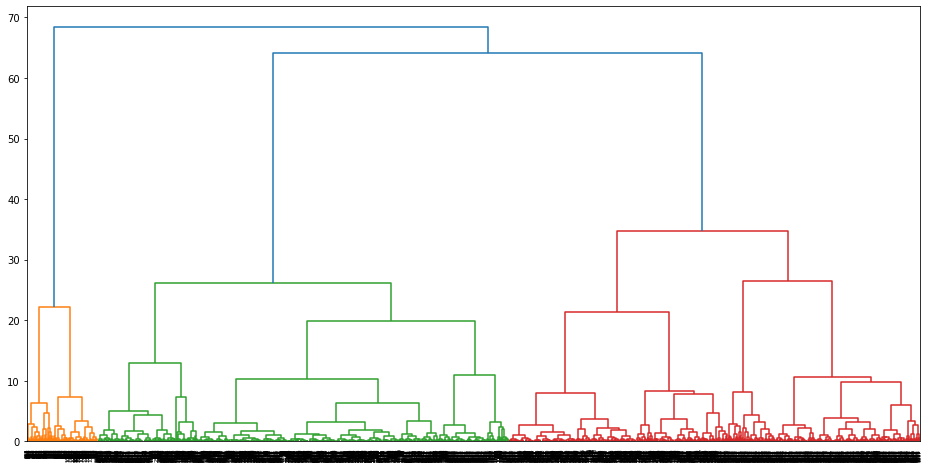

In [147]:
from sklearn import preprocessing 
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

scaler = preprocessing.StandardScaler().fit(df[['delta t', 'delta m']])
X_scaled = scaler.transform(df[['delta t', 'delta m']])

import scipy.cluster.hierarchy as sch

fig = plt.figure(figsize = (16,8))

fig = sch.dendrogram(sch.linkage(X_scaled, method='ward'))


From the ward method and dendogram we can see that the optimal number of clusters is 4

In [148]:
dates = list(set(df['date']))
df_groupbys = df.groupby('date')

dfs = []

for date in dates :
    temp_df = df_groupbys.get_group(date)
    
    scaler = preprocessing.StandardScaler().fit(temp_df[['delta t']])
    X_scaled = scaler.transform(temp_df[['delta t']])
    
    cluster = AgglomerativeClustering(n_clusters=4, linkage='average',
                           affinity=pearson_affinity)
    cluster.fit(X_scaled)
    
    temp_df['labels'] = cluster.labels_
    
    dfs.append(temp_df)



<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-148-a67182e6c61f>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [149]:
df1 = pd.concat(dfs)
df1

,index,date,delta t,delta m,address,lon_lat,labels
75,75,16.03.16,20.82,1.180,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]",0
75,75,16.03.16,16.10,8.700,"Сейфуллина 37, Нұр-Сұлтан","[71.42974036780862, 51.172306]",1
75,75,16.03.16,25.45,0.166,Манас 12 Нұр-Сұлтан,"[71.4893367, 51.1577124]",0
75,75,16.03.16,13.65,9.610,Букейхана 2,"[71.42645568909903, 51.15898305]",1
74,74,16.03.16,19.42,2.370,Букейхана 2/1,"[71.42697234398388, 51.15873]",1
...,...,...,...,...,...,...,...
10,10,11.01.16,29.22,3.520,"Сейфуллина 5, Нұр-Сұлтан","[71.40179729812897, 51.1690605]",0
10,10,11.01.16,27.68,2.950,"Туран 8, Нұр-Сұлтан","[71.47598661658415, 51.1398815]",0
10,10,11.01.16,25.39,3.971,"Сейфуллина 25, Нұр-Сұлтан","[71.41874000720827, 51.1710548]",1
10,10,11.01.16,32.84,6.619,"Женис 24, Нұр-Сұлтан","[71.4129873, 51.17078775]",3


In [150]:
df1.to_csv('clustereddata.csv')

In [158]:
dates = list(set(df_withmov['date']))
df_groupbys = df_withmov.groupby('date')

dfs_mov = []

for date in dates :
    temp_df = df_groupbys.get_group(date)
    
    scaler = preprocessing.StandardScaler().fit(temp_df[['delta t', '7pnt_mov_avg_dt']])
    X_scaled = scaler.transform(temp_df[['delta t', '7pnt_mov_avg_dt']])
    
    cluster = AgglomerativeClustering(n_clusters=4, linkage='average',
                           affinity=pearson_affinity)
    cluster.fit(X_scaled)
    
    temp_df['labels'] = cluster.labels_
    
    dfs_mov.append(temp_df)



<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['labels'] = cluster.labels_
<ipython-input-158-99b5322599f1>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

In [159]:
df2 = pd.concat(dfs_mov)
df2

,index,date,delta t,delta m,address,lon_lat,7pnt_mov_avg_dt,7pnt_mov_avg_dm,labels
75,75,16.03.16,20.82,1.180,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]",21.040000,1.195714,1
75,75,16.03.16,16.10,8.700,"Сейфуллина 37, Нұр-Сұлтан","[71.42974036780862, 51.172306]",16.591429,8.928571,1
75,75,16.03.16,25.45,0.166,Манас 12 Нұр-Сұлтан,"[71.4893367, 51.1577124]",25.537143,0.162857,0
75,75,16.03.16,13.65,9.610,Букейхана 2,"[71.42645568909903, 51.15898305]",13.637143,9.812857,0
74,74,16.03.16,19.42,2.370,Букейхана 2/1,"[71.42697234398388, 51.15873]",19.490000,2.378571,0
...,...,...,...,...,...,...,...,...,...
10,10,11.01.16,29.22,3.520,"Сейфуллина 5, Нұр-Сұлтан","[71.40179729812897, 51.1690605]",33.780000,4.602857,1
10,10,11.01.16,27.68,2.950,"Туран 8, Нұр-Сұлтан","[71.47598661658415, 51.1398815]",37.415714,4.071429,0
10,10,11.01.16,25.39,3.971,"Сейфуллина 25, Нұр-Сұлтан","[71.41874000720827, 51.1710548]",32.478571,4.996286,0
10,10,11.01.16,32.84,6.619,"Женис 24, Нұр-Сұлтан","[71.4129873, 51.17078775]",41.111429,8.410286,3


In [160]:
df2 = df2.drop(columns = ['index'])
df2

,date,delta t,delta m,address,lon_lat,7pnt_mov_avg_dt,7pnt_mov_avg_dm,labels
75,16.03.16,20.82,1.180,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]",21.040000,1.195714,1
75,16.03.16,16.10,8.700,"Сейфуллина 37, Нұр-Сұлтан","[71.42974036780862, 51.172306]",16.591429,8.928571,1
75,16.03.16,25.45,0.166,Манас 12 Нұр-Сұлтан,"[71.4893367, 51.1577124]",25.537143,0.162857,0
75,16.03.16,13.65,9.610,Букейхана 2,"[71.42645568909903, 51.15898305]",13.637143,9.812857,0
74,16.03.16,19.42,2.370,Букейхана 2/1,"[71.42697234398388, 51.15873]",19.490000,2.378571,0
...,...,...,...,...,...,...,...,...
10,11.01.16,29.22,3.520,"Сейфуллина 5, Нұр-Сұлтан","[71.40179729812897, 51.1690605]",33.780000,4.602857,1
10,11.01.16,27.68,2.950,"Туран 8, Нұр-Сұлтан","[71.47598661658415, 51.1398815]",37.415714,4.071429,0
10,11.01.16,25.39,3.971,"Сейфуллина 25, Нұр-Сұлтан","[71.41874000720827, 51.1710548]",32.478571,4.996286,0
10,11.01.16,32.84,6.619,"Женис 24, Нұр-Сұлтан","[71.4129873, 51.17078775]",41.111429,8.410286,3


In [161]:
df2.to_csv('clustereddata_mov_avg.csv')

In [156]:
df1 = df1.reset_index(drop = True)
df1.loc[df1.date == '04.01.16']

,index,date,delta t,delta m,address,lon_lat,labels
47,3,04.01.16,30.95,1.780,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]",1
48,3,04.01.16,24.84,15.400,"Сейфуллина 37, Нұр-Сұлтан","[71.42974036780862, 51.172306]",0
49,3,04.01.16,37.95,0.280,Манас 12 Нұр-Сұлтан,"[71.4893367, 51.1577124]",1
50,3,04.01.16,27.67,0.764,Өндіріс 4 Нұр-Сұлтан,"[71.3820717, 51.2370001]",0
51,3,04.01.16,41.50,1.289,"Есенберлин, 4, Нұр-Сұлтан","[71.4037929, 51.1923627]",1
52,3,04.01.16,19.79,14.620,Букейхана 2,"[71.42645568909903, 51.15898305]",0
53,2,04.01.16,34.93,3.420,Букейхана 2/1,"[71.42697234398388, 51.15873]",1
54,3,04.01.16,40.47,1.240,"Жумабаева 14, Нұр-Сұлтан","[71.48230268701327, 51.15274505]",1
55,3,04.01.16,30.39,0.853,"Шынтас 1, Нұр-Сұлтан","[71.39820238969105, 51.1981188]",1
56,3,04.01.16,18.47,16.200,"Гумар Караш 2, Нұр-Сұлтан","[71.4348819, 51.1615441]",0
